In [1]:
from sematch.semantic.similarity import YagoTypeSimilarity  # Ganti dengan YagoTypeSimilarity
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from itertools import combinations
from googletrans import Translator
from deep_translator import GoogleTranslator
import nltk
import re



In [2]:
df = pd.read_csv('./assets/dataset.csv', delimiter='\t', header=None, index_col=False)
df

,0
0,"basis data relasional keuntungan "" mudah m..."
1,"basis data relasional keuntungan "" mudah m..."
2,"basis data keuntungan "" mudah mengoperasi ..."
3,"basis data relasional keuntungan "" mudah me..."
4,"basis data relasional menggunakan "" tabel d..."
5,"basis data relasional pengertian "" tabel du..."
6,"basis data relasional keuntungan "" mudah me..."
7,"basis data relasional menggunakan "" tabel d..."
8,"basis data relasional menggunakan "" tabel d..."
9,"basis data relasional menggunakan "" tabel 2..."


In [3]:
def translate_to_english(text):
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated

In [4]:
def casefolding(text):
    text = translate_to_english(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text



In [5]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  return text

In [6]:
%%time
for i in df.columns:
  df[i]=df[i].apply(text_preprocessing_process)

CPU times: total: 156 ms
Wall time: 20.5 s


In [7]:
df.to_csv(r'.\assets\clean_proposisi_full.csv')

In [8]:
df

,0
0,relational database advantages easy to perform...
1,relational database advantages easy to perform...
2,advantage database easy to operate data advant...
3,relational database advantage easy to perform ...
4,relational databases use twodimensional tables...
5,relational database meaning twodimensional tab...
6,relational databases advantages easy to operat...
7,relational databases use twodimensional tables...
8,relational databases use twodimensional tables...
9,relational databases use 2dimensional tables 2...


In [9]:
from sematch.semantic.similarity import YagoTypeSimilarity
import nltk

def wup_sims(set1, set2):
    wns = YagoTypeSimilarity()

    def label_words(words):
        tagged_words = nltk.pos_tag(words)
        labeled_words = {'nouns': [], 'verbs': []}
        
        for word, pos in tagged_words:
            if pos.startswith('N'):
                labeled_words['nouns'].append(word)
            elif pos.startswith('V'):
                labeled_words['verbs'].append(word)
        
        return labeled_words

    def calculate_max_similarity(words1, words2):
        max_similarity = 0

        for word1 in words1:
            for word2 in words2:
                if wns.word2synset(word1) and wns.word2synset(word2):
                    similarity_score = wns.monol_word_similarity(word1, word2, 'eng', 'wup')
                    max_similarity = max(max_similarity, similarity_score)

        return max_similarity

    labeled_set1 = label_words(set1)
    labeled_set2 = label_words(set2)

    max_similarity_noun = []
    max_similarity_verb = []

    for noun in labeled_set1['nouns']:
        max_similarity_noun.append(calculate_max_similarity([noun], labeled_set2['nouns']))
        
    for verb in labeled_set1['verbs']:
        max_similarity_verb.append(calculate_max_similarity([verb], labeled_set2['verbs']))

    total_max_similarity_noun = sum(max_similarity_noun) / len(max_similarity_noun) if len(max_similarity_noun) > 0 else 0
    total_max_similarity_verb = sum(max_similarity_verb) / len(max_similarity_verb) if len(max_similarity_verb) > 0 else 0

    weighted_average_similarity = (total_max_similarity_noun * 0.75) + (total_max_similarity_verb * 0.25)

    return weighted_average_similarity


In [10]:
from sematch.semantic.similarity import YagoTypeSimilarity
import nltk

def wup_sims2(set1, set2):
    wns = YagoTypeSimilarity()

    def label_words(words):
        tagged_words = nltk.pos_tag(words)
        labeled_words = {'nouns': [], 'verbs': []}
        
        for word, pos in tagged_words:
            if pos.startswith('N'):
                labeled_words['nouns'].append(word)
            elif pos.startswith('V'):
                labeled_words['verbs'].append(word)
        
        return labeled_words

    def calculate_max_similarity(words1, words2):
        max_similarity = 0

        for word1 in words1:
            for word2 in words2:
                if wns.word2synset(word1) and wns.word2synset(word2):
                    similarity_score = wns.monol_word_similarity(word1, word2, 'eng', 'wup')
                    max_similarity = max(max_similarity, similarity_score)

        return max_similarity

    labeled_set1 = label_words(set1)
    labeled_set2 = label_words(set2)

    max_similarity_noun = []
    max_similarity_verb = []

    for noun in labeled_set1['nouns']:
        max_similarity_noun.append(calculate_max_similarity([noun], labeled_set2['nouns']))
        
    for verb in labeled_set1['verbs']:
        max_similarity_verb.append(calculate_max_similarity([verb], labeled_set2['verbs']))

    total_max_similarity_noun = sum(max_similarity_noun) / len(max_similarity_noun) if len(max_similarity_noun) > 0 else 0
    total_max_similarity_verb = sum(max_similarity_verb) / len(max_similarity_verb) if len(max_similarity_verb) > 0 else 0

    weighted_average_similarity = (total_max_similarity_noun * 0.25) + (total_max_similarity_verb * 0.75)

    return weighted_average_similarity


In [11]:

# Inisialisasi list untuk menyimpan teks
texts = [df[0][i] for i in range(len(df))]

# Inisialisasi dictionary untuk menyimpan nilai Jaccard similarity
yago_score = {}
score_teach = {}
teacher_index = 27


In [14]:
# Index of the teacher in the dataset
teacher_index = 27


for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        set_a = nltk.tokenize.word_tokenize(texts[i])
        set_b = nltk.tokenize.word_tokenize(texts[j])

        if (i == teacher_index and j != teacher_index) or (i != teacher_index and j == teacher_index):
            yago_score[(i + 1, j + 1)] = wup_sims(set_a, set_b)
            print(f"{yago_score[(i + 1, j + 1)]}")

0.8395061728395063
0.8262414614968794
0.7598644721046315
0.7700050057208238
0.7416176997114636
0.698346411735426
0.7843260130139011
0.8449050105078151
0.8433116883116883
0.7355191894162482
0.8139794834938024
0.8182275719747388
0.8057080315678903
0.8107189794496296
0.8240820760122232
0.8269757203580733
0.8277978320514809
0.8081086601307189
0.8412698412698414
0.8412698412698414
0.7712301587301588
0.6889232623206115
0.7447422615451258
0.8060416666666667
0.8686271743592285
0.8293910327288809
0.8263211534613846


In [13]:
# Index of the teacher in the dataset
teacher_index = 27


for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        set_a = nltk.tokenize.word_tokenize(texts[i])
        set_b = nltk.tokenize.word_tokenize(texts[j])

        if (i == teacher_index and j != teacher_index) or (i != teacher_index and j == teacher_index):
            score_teach[(i + 1, j + 1)] = wup_sims2(set_a, set_b)
            print(f"{score_teach[(i + 1, j + 1)]}")

0.6018518518518519
0.5527984585647123
0.5440044438828163
0.544314534070684
0.5506676354752428
0.43766409002625445
0.5657898304249236
0.6542331655744513
0.7356493506493507
0.4820077970323068
0.6023394529876728
0.6936752385531031
0.5448814476448474
0.7105452167371672
0.6344311019862491
0.7312324113794701
0.7076111832292726
0.6027028867102396
0.747089947089947
0.747089947089947
0.3867063492063492
0.5000652415072887
0.4396907960934322
0.5464583333333334
0.7919280347055925
0.6552820470293381
0.6369599923302655


In [13]:
# Print the results
print("Wu Palmer similarity scores:")
scores = []
pairs = []
for pair, score in yago_score.items():
    print("Students {} and Teacher {}: {}".format(pair[0], pair[1], score))
    scores.append(score)
    pairs.append(pair)

Wu Palmer similarity scores:
Students 1 and Teacher 28: 0.8395061728395063
Students 2 and Teacher 28: 0.8262414614968794
Students 3 and Teacher 28: 0.7598644721046315
Students 4 and Teacher 28: 0.7700050057208238
Students 5 and Teacher 28: 0.7416176997114636
Students 6 and Teacher 28: 0.698346411735426
Students 7 and Teacher 28: 0.7843260130139011
Students 8 and Teacher 28: 0.8449050105078151
Students 9 and Teacher 28: 0.8433116883116883
Students 10 and Teacher 28: 0.7355191894162482
Students 11 and Teacher 28: 0.8139794834938024
Students 12 and Teacher 28: 0.8182275719747388
Students 13 and Teacher 28: 0.8057080315678903
Students 14 and Teacher 28: 0.8107189794496296
Students 15 and Teacher 28: 0.8240820760122232
Students 16 and Teacher 28: 0.8269757203580733
Students 17 and Teacher 28: 0.8277978320514809
Students 18 and Teacher 28: 0.8081086601307189
Students 19 and Teacher 28: 0.8412698412698414
Students 20 and Teacher 28: 0.8412698412698414
Students 21 and Teacher 28: 0.77123015873

In [15]:
print("Nilai tertinggi Guru dan Siswa : ", np.max(scores))
print("--------------------------------")
print("Nilai terendah Guru dan Siswa :", np.min(scores))
print("--------------------------------")
print("Nilai rata-rata Guru dan Siswa :", np.mean(scores))

Nilai tertinggi Guru dan Siswa :  0.8686271743592285
--------------------------------
Nilai terendah Guru dan Siswa : 0.6889232623206115
--------------------------------
Nilai rata-rata Guru dan Siswa : 0.7998910323055068


In [16]:
threshold1 = 0.8
countS   = 0
countD = 0
for pair, score in yago_score.items():
    print("Texts {} and {}: {}".format(pair[0], pair[1], score))
    if score > threshold1:
      print("The texts are similar.")
      countS = countS+1
    else:
      print("The texts are dissimilar.")
      countD = countD+1
print("Jumlah Data Mirip : ", countS)
print("Jumlah Data Tidak Mirip : ", countD)

Texts 1 and 28: 0.8395061728395063
The texts are similar.
Texts 2 and 28: 0.8262414614968794
The texts are similar.
Texts 3 and 28: 0.7598644721046315
The texts are dissimilar.
Texts 4 and 28: 0.7700050057208238
The texts are dissimilar.
Texts 5 and 28: 0.7416176997114636
The texts are dissimilar.
Texts 6 and 28: 0.698346411735426
The texts are dissimilar.
Texts 7 and 28: 0.7843260130139011
The texts are dissimilar.
Texts 8 and 28: 0.8449050105078151
The texts are similar.
Texts 9 and 28: 0.8433116883116883
The texts are similar.
Texts 10 and 28: 0.7355191894162482
The texts are dissimilar.
Texts 11 and 28: 0.8139794834938024
The texts are similar.
Texts 12 and 28: 0.8182275719747388
The texts are similar.
Texts 13 and 28: 0.8057080315678903
The texts are similar.
Texts 14 and 28: 0.8107189794496296
The texts are similar.
Texts 15 and 28: 0.8240820760122232
The texts are similar.
Texts 16 and 28: 0.8269757203580733
The texts are similar.
Texts 17 and 28: 0.8277978320514809
The texts ar

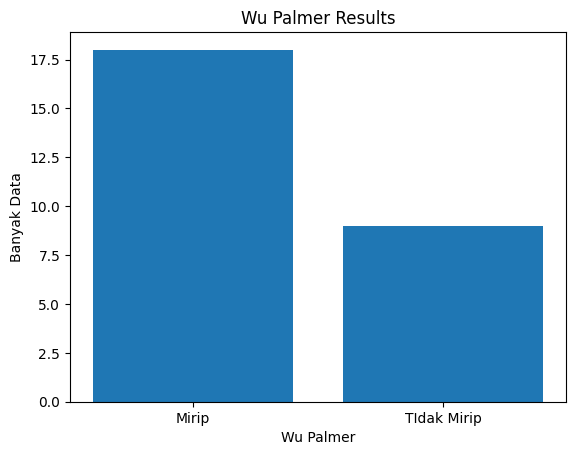

In [17]:
import matplotlib.pyplot as plt

# Data
labels = ['Mirip', 'TIdak Mirip']
values = [countS, countD]

# Visualisasi
plt.bar(labels, values)
plt.xlabel('Wu Palmer')
plt.ylabel('Banyak Data')
plt.title('Wu Palmer Results')
plt.show()

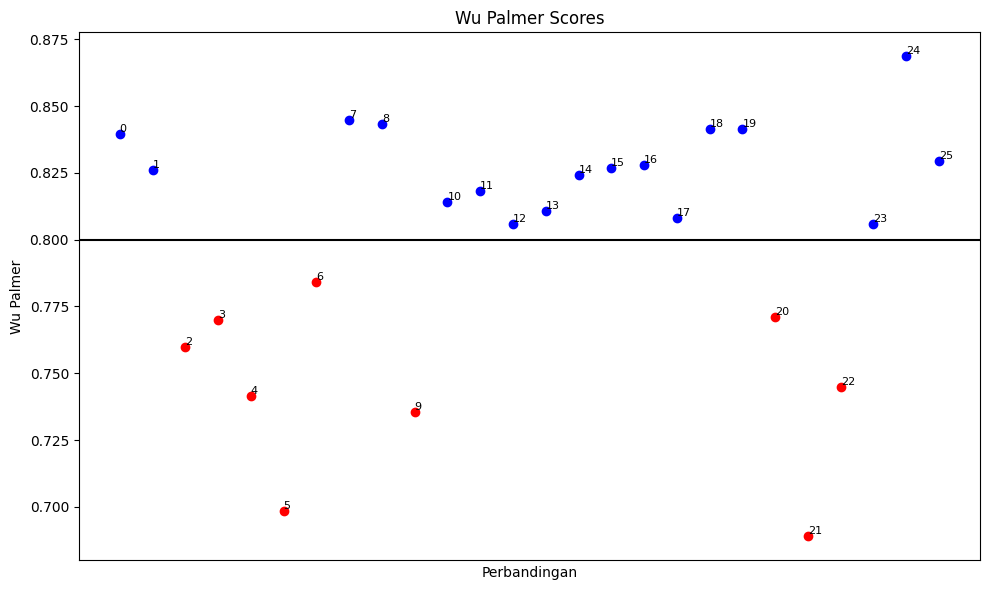

In [27]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
# Extract texts and scores
textsplot = [str(pair[0]) + " and " + str(pair[1]) for pair in yago_score.keys()]
scoresplot = list(yago_score.values())

for i in range(len(scores)-1):
  if scores[i]>threshold1:
    plt.scatter(textsplot[i], scoresplot[i], color='blue', marker='o')
  else:
    plt.scatter(textsplot[i], scoresplot[i], color='red', marker='o')
  
  plt.text(textsplot[i], scoresplot[i], str(i), ha='left', va='bottom', fontsize=8)

# Menambahkan garis threshold pada scatter plot
plt.axhline(y=threshold1, color='black', linestyle='solid', label='Threshold')
# plt.plot(texts, scores)


# Menambahkan judul dan label sumbu
plt.title('Wu Palmer Scores')
plt.xlabel('Perbandingan')
plt.ylabel('Wu Palmer')

# Mengatur rotasi label pada sumbu x untuk keterbacaan
# labels = [x for x in range(1, len(scores)+1)]
# plt.xticks(ticks=range(len(scores)), rotation=90, ha='right', labels=labels)
plt.tick_params(labelbottom = False, bottom = False)

# Menampilkan scatter plot
plt.tight_layout()
plt.show()

In [28]:
threshold1 = 0.7
countS   = 0
countD = 0
for pair, score in yago_score.items():
    print("Texts {} and {}: {}".format(pair[0], pair[1], score))
    if score > threshold1:
      print("The texts are similar.")
      countS = countS+1
    else:
      print("The texts are dissimilar.")
      countD = countD+1
print("Jumlah Data Mirip : ", countS)
print("Jumlah Data Tidak Mirip : ", countD)

Texts 1 and 28: 0.8395061728395063
The texts are similar.
Texts 2 and 28: 0.8262414614968794
The texts are similar.
Texts 3 and 28: 0.7598644721046315
The texts are similar.
Texts 4 and 28: 0.7700050057208238
The texts are similar.
Texts 5 and 28: 0.7416176997114636
The texts are similar.
Texts 6 and 28: 0.698346411735426
The texts are dissimilar.
Texts 7 and 28: 0.7843260130139011
The texts are similar.
Texts 8 and 28: 0.8449050105078151
The texts are similar.
Texts 9 and 28: 0.8433116883116883
The texts are similar.
Texts 10 and 28: 0.7355191894162482
The texts are similar.
Texts 11 and 28: 0.8139794834938024
The texts are similar.
Texts 12 and 28: 0.8182275719747388
The texts are similar.
Texts 13 and 28: 0.8057080315678903
The texts are similar.
Texts 14 and 28: 0.8107189794496296
The texts are similar.
Texts 15 and 28: 0.8240820760122232
The texts are similar.
Texts 16 and 28: 0.8269757203580733
The texts are similar.
Texts 17 and 28: 0.8277978320514809
The texts are similar.
Text

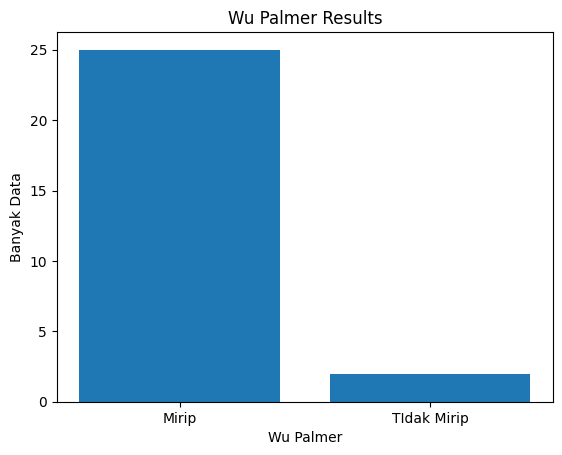

In [29]:
import matplotlib.pyplot as plt

# Data
labels = ['Mirip', 'TIdak Mirip']
values = [countS, countD]

# Visualisasi
plt.bar(labels, values)
plt.xlabel('Wu Palmer')
plt.ylabel('Banyak Data')
plt.title('Wu Palmer Results')
plt.show()

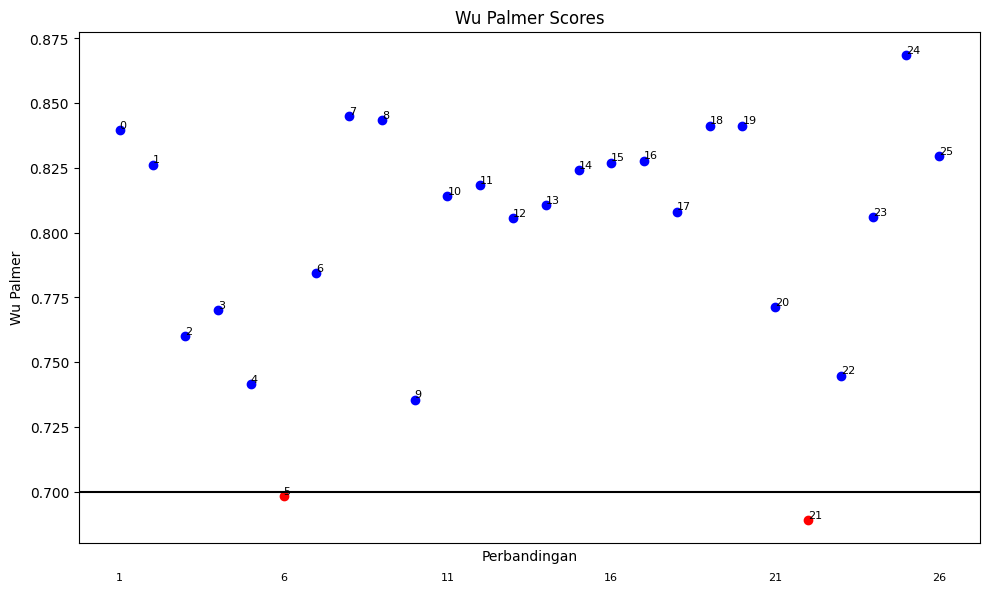

In [38]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
# Extract texts and scores
textsplot = [str(pair[0]) + " and " + str(pair[1]) for pair in yago_score.keys()]
scoresplot = list(yago_score.values())

for i in range(len(scores)-1):
  if scores[i]>threshold1:
    plt.scatter(textsplot[i], scoresplot[i], color='blue', marker='o')
  else:
    plt.scatter(textsplot[i], scoresplot[i], color='red', marker='o')
  plt.text(textsplot[i], scoresplot[i], str(i), ha='left', va='bottom', fontsize=8)

# Menambahkan garis threshold pada scatter plot
plt.axhline(y=threshold1, color='black', linestyle='solid', label='Threshold')
for i in range(0, len(scoresplot), 5):
    plt.text(textsplot[i], min(scoresplot) - 0.02, f'{i+1}', ha='center', va='top', fontsize=8, color='black')
# plt.plot(texts, scores)


# Menambahkan judul dan label sumbu
plt.title('Wu Palmer Scores')
plt.xlabel('Perbandingan')
plt.ylabel('Wu Palmer')

# Mengatur rotasi label pada sumbu x untuk keterbacaan
# labels = [x for x in range(1, len(scores)+1)]
# plt.xticks(ticks=range(len(scores)), rotation=90, ha='right', labels=labels)
plt.tick_params(labelbottom = False, bottom = False)

# Menampilkan scatter plot
plt.tight_layout()
plt.show()

In [20]:
threshold1 = 0.6
countS   = 0
countD = 0
for pair, score in yago_score.items():
    print("Texts {} and {}: {}".format(pair[0], pair[1], score))
    if score > threshold1:
      print("The texts are similar.")
      countS = countS+1
    else:
      print("The texts are dissimilar.")
      countD = countD+1
print("Jumlah Data Mirip : ", countS)
print("Jumlah Data Tidak Mirip : ", countD)

Texts 1 and 28: 0.8395061728395063
The texts are similar.
Texts 2 and 28: 0.8262414614968794
The texts are similar.
Texts 3 and 28: 0.7598644721046315
The texts are similar.
Texts 4 and 28: 0.7700050057208238
The texts are similar.
Texts 5 and 28: 0.7416176997114636
The texts are similar.
Texts 6 and 28: 0.698346411735426
The texts are similar.
Texts 7 and 28: 0.7843260130139011
The texts are similar.
Texts 8 and 28: 0.8449050105078151
The texts are similar.
Texts 9 and 28: 0.8433116883116883
The texts are similar.
Texts 10 and 28: 0.7355191894162482
The texts are similar.
Texts 11 and 28: 0.8139794834938024
The texts are similar.
Texts 12 and 28: 0.8182275719747388
The texts are similar.
Texts 13 and 28: 0.8057080315678903
The texts are similar.
Texts 14 and 28: 0.8107189794496296
The texts are similar.
Texts 15 and 28: 0.8240820760122232
The texts are similar.
Texts 16 and 28: 0.8269757203580733
The texts are similar.
Texts 17 and 28: 0.8277978320514809
The texts are similar.
Texts 1

In [48]:
from scipy.stats import pearsonr

# Data yang diberikan
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
value = [1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1]

# Menghitung koefisien korelasi Pearson
pearson_coefficient, p_value = pearsonr(expert_judgement, value)

# Menampilkan hasil
print(f"Koefisien Korelasi Pearson: {pearson_coefficient}")
print(f"P-Value: {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05
if p_value < alpha:
    print("Terdapat korelasi yang signifikan antara kedua set data.")
else:
    print("Tidak terdapat korelasi yang signifikan antara kedua set data.")


Koefisien Korelasi Pearson: 0.09999999999999996
P-Value: 0.6197005530414494
Tidak terdapat korelasi yang signifikan antara kedua set data.


In [50]:
from scipy.stats import pearsonr

# Data yang diberikan
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
value = [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1]

# Menghitung koefisien korelasi Pearson
pearson_coefficient, p_value = pearsonr(expert_judgement, value)

# Menampilkan hasil
print(f"Koefisien Korelasi Pearson: {pearson_coefficient}")
print(f"P-Value: {p_value}")

# Menentukan tingkat signifikansi
alpha = 0.05
if p_value < alpha:
    print("Terdapat korelasi yang signifikan antara kedua set data.")
else:
    print("Tidak terdapat korelasi yang signifikan antara kedua set data.")


Koefisien Korelasi Pearson: -0.08
P-Value: 0.6916189451062822
Tidak terdapat korelasi yang signifikan antara kedua set data.


In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Confusion Matrix:
[[ 1  1]
 [ 8 17]]

Metrics:
Precision: 0.9444
Recall: 0.6800
Specificity: 0.9444
Accuracy: 0.6667
F1 Score: 0.7907


In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Confusion Matrix:
[[ 0  2]
 [ 2 23]]

Metrics:
Precision: 0.9200
Recall: 0.9200
Specificity: 0.9200
Accuracy: 0.8519
F1 Score: 0.9200


In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Data
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted_value = [1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1]

# Confusion Matrix
conf_matrix = confusion_matrix(expert_judgement, predicted_value)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(expert_judgement, predicted_value)
recall = recall_score(expert_judgement, predicted_value)
accuracy = accuracy_score(expert_judgement, predicted_value)
f1 = f1_score(expert_judgement, predicted_value)

# Specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display Metrics
print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[ 0  2]
 [ 4 21]]

Metrics:
Precision: 0.9130
Recall: 0.8400
Specificity: 0.9130
Accuracy: 0.7778
F1 Score: 0.8750


In [2]:
from scipy.stats import spearmanr

# Data yang diberikan
expert_judgement = [1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
value = [1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1]

# Menghitung koefisien korelasi Spearman
spearman_coefficient, p_value = spearmanr(expert_judgement, value)

# Menampilkan hasil
print(f"Koefisien Korelasi Spearman: {spearman_coefficient}")
print(f"P-Value: {p_value}")


Koefisien Korelasi Spearman: 0.1
P-Value: 0.6197005530414494
